# Decision tree making

## Class Distribution

In [3]:
import pandas as pd


data = pd.read_csv("Data/clustering_data.csv")

# Calculate the distribution of class labels
class_distribution = data['FATALS'].value_counts(normalize=True) * 100

print(class_distribution)


FATALS
1    90.911703
2     7.590000
3     1.085752
4     0.309922
5     0.088256
6     0.012315
7     0.002052
Name: proportion, dtype: float64


This distribution indicates a highly imbalanced dataset, with a vast majority of the cases (over 90%) falling into class '1'. Such an imbalance can have significant effects on the performance of classification algorithms:

Bias Towards Majority Class: The models are likely to be biased towards predicting the majority class due to its prevalence in the dataset. This can lead to high overall accuracy but poor performance in predicting minority classes.

Overfitting: Models might overfit the majority class while failing to generalize well to minority classes.

Evaluation Metrics: Traditional metrics like accuracy can be misleading. For imbalanced datasets, metrics like precision, recall, F1-score, and the area under the ROC curve are more informative.

## Pre-Process the data

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv("Data/clustering_data.csv")

# Select the relevant features and target variable
features = data[['MAKENAME', 'MOD_YEAR', 'WEATHER', 'LGT_COND', 'DR_DRINK', 'HIT_RUN']]
target = data['FATALS']

# Encoding categorical variables
label_encoders = {}
for column in ['MAKENAME', 'WEATHER', 'LGT_COND']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=74)

# Creating and training a baseline decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=74)
dt_classifier.fit(X_train, y_train)

# Predicting using the baseline decision tree
y_pred = dt_classifier.predict(X_test)

# Evaluating the baseline decision tree
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report and confusion matrix
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.98      0.94      8865
           2       0.08      0.02      0.03       739
           3       0.03      0.01      0.02       103
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1

    accuracy                           0.89      9745
   macro avg       0.17      0.17      0.16      9745
weighted avg       0.83      0.89      0.86      9745

Confusion Matrix:
 [[8669  156   25   10    1    4]
 [ 722   14    2    1    0    0]
 [ 101    1    1    0    0    0]
 [  25    1    0    0    0    0]
 [  10    0    1    0    0    0]
 [   1    0    0    0    0    0]]


/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_38159/218929794.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_38159/218929794.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_38159/218929794.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

## Baseline Model Result

#### Classification Report Analysis：

1. Class '1' (Most Likely Single Fatality)
    High precision (0.91) and recall (0.98), indicating good model performance for this class.
    The model correctly predicts most of the single fatality cases.
2. Class '2' and Beyond (Multiple Fatalities)
    Significantly lower precision and recall, particularly for classes 3 to 6.
    Indicates poor performance in predicting instances with more than one fatality.
3. Overall Accuracy
    The accuracy is 0.89, which seems high. However, this is largely due to the model's performance on the most common class (class 1).

#### Confusion Matrix Analysis
1. Class '1'
    The model correctly predicted 8664 out of 8866 cases.
    Most errors involve class '1' being predicted when it's actually class '2'.
2. Classes '2' to '6'
    High misclassification rates, with the majority being incorrectly predicted as class '1'.
    Very few correct predictions for these classes.

The analysis shows that while the model performs well for the most common scenario, it struggles with less common, potentially more complex scenarios. Adjusting your approach to address these challenges will be key in developing a more robust model.

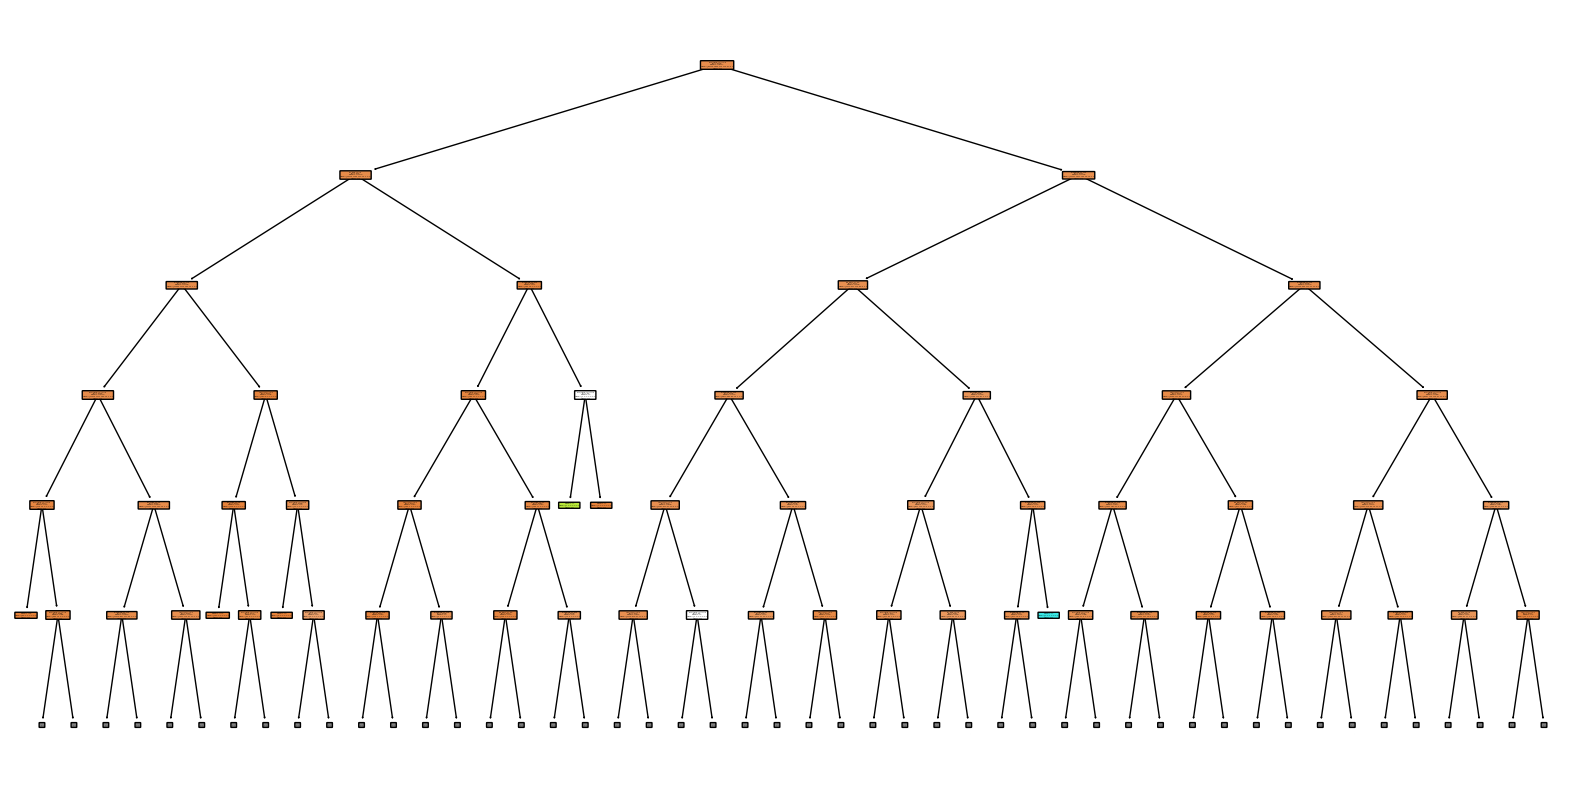

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming the decision tree model is stored in `dt_classifier`
plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          feature_names=['MAKENAME', 'MOD_YEAR', 'WEATHER', 'LGT_COND', 'DR_DRINK', 'HIT_RUN'],
          max_depth=5)  
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creating and training a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust the number of trees with n_estimators
rf_classifier.fit(X_train, y_train)

# Predicting using the Random Forest
rf_predictions = rf_classifier.predict(X_test)

# Evaluating the Random Forest
rf_class_report = classification_report(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_feature_importances = rf_classifier.feature_importances_

# Print the evaluation metrics and feature importances
print("Random Forest Classification Report:\n", rf_class_report)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Feature Importances:\n", rf_feature_importances)


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.99      0.95      8865
           2       0.08      0.01      0.02       739
           3       0.08      0.01      0.02       103
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1

    accuracy                           0.90      9745
   macro avg       0.18      0.17      0.16      9745
weighted avg       0.83      0.90      0.86      9745

Random Forest Confusion Matrix:
 [[8734  114   10    5    1    1]
 [ 727   10    2    0    0    0]
 [ 101    1    1    0    0    0]
 [  26    0    0    0    0    0]
 [  11    0    0    0    0    0]
 [   1    0    0    0    0    0]]
Feature Importances:
 [0.45333601 0.37445312 0.06831496 0.07700216 0.02204419 0.00484956]


### Classification Report Analysis Based on Random Forest

1. Class '1' (Most Likely Single Fatality):
    High precision (0.91) and recall (0.99), indicating the model is very effective in predicting this class.
2. Class '2' and Beyond (Multiple Fatalities):
    Low precision and recall for these classes, similar to the baseline decision tree.
    Indicates a struggle to correctly predict cases with multiple fatalities.
3. Overall Accuracy:
    The accuracy is 0.90, which is slightly better than the baseline decision tree. However, this is still largely due to the model's performance on the most common class (class 1).

### Confusion Matrix Analysis
1. Class '1':
    High number of correct predictions (8734 out of 8865).
    Relatively few misclassifications into other classes.
2. Classes '2' to '6':
    Majority are incorrectly predicted as class '1'.
    Very few correct predictions for these classes, indicating that the model struggles with minority classes.

### Feature Importances Analysis

1. MAKENAME and MOD_YEAR:
    These features have the highest importance scores (0.453 and 0.374 respectively), suggesting they are the most influential in the model's decisions.
2. Other Features:
    WEATHER, LGT_COND, DR_DRINK, and HIT_RUN have lower importance scores, indicating less influence on the model's predictions.


The Random Forest model provides a slight improvement over the baseline decision tree, especially in overall accuracy, but still faces challenges with the less common classes. Addressing the data imbalance and exploring alternative models or features could lead to further improvements.

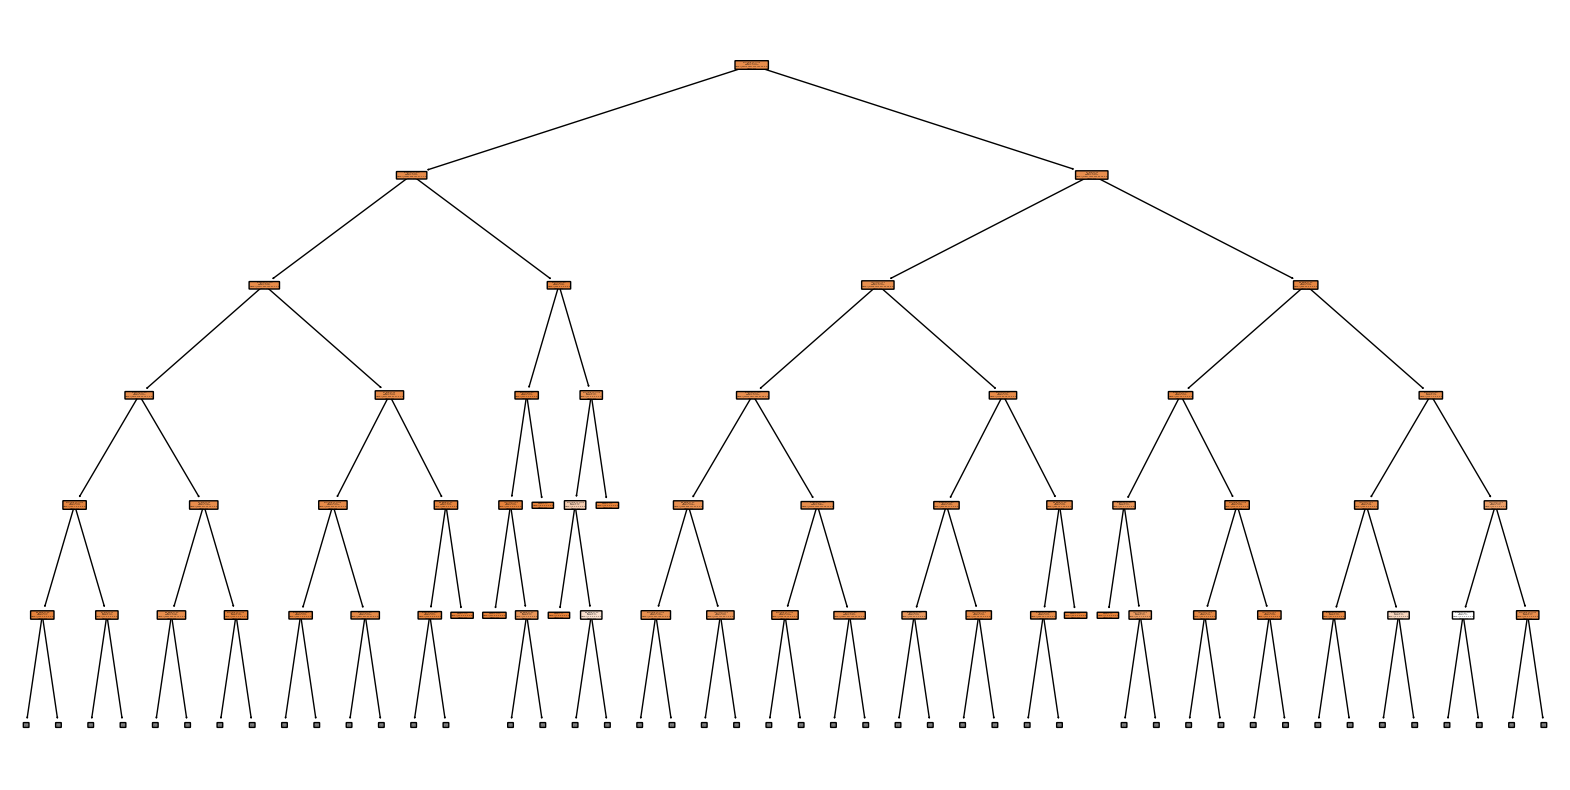

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


tree_in_rf = rf_classifier.estimators_[0]

# Visualizing the selected tree
plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(tree_in_rf, 
          filled=True, 
          rounded=True, 
          feature_names=['MAKENAME', 'MOD_YEAR', 'WEATHER', 'LGT_COND', 'DR_DRINK', 'HIT_RUN'],
          max_depth=5,  
          class_names=True)
plt.show()


## Hyper- Parameter Tunning

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Load the data
data = pd.read_csv("Data/clustering_data.csv")

# Select the relevant features and target variable
features = data[['MAKENAME', 'MOD_YEAR', 'WEATHER', 'LGT_COND', 'DR_DRINK', 'HIT_RUN']]
target = data['FATALS']

# Encoding categorical variables
label_encoders = {}
for column in ['MAKENAME', 'WEATHER', 'LGT_COND']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=74)

# Parameter grid for Random Search
param_dist = {
    "n_estimators": sp_randint(10, 200),
    "max_depth": sp_randint(3, 20),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "max_features": sp_randint(1, X_train.shape[1]+1)
}

# Setting up RandomizedSearchCV
# Using 10 iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=74),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    random_state=74,
    n_jobs=-1  # Using all processors
)

# Running the Random Search
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)



/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_38159/3656630604.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_38159/3656630604.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
/var/folders/h3/qs6jt3s124g0xq78192txdnr0000gn/T/ipykernel_38159/3656630604.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Best Parameters: {'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 112}


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier with the best parameters
tuned_rf = RandomForestClassifier(
    n_estimators=112,
    max_depth=9,
    min_samples_split=6,
    min_samples_leaf=8,
    max_features=4,
    random_state=74
)

# Train the model
tuned_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = tuned_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.909697280656747
Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95      8865
           2       0.00      0.00      0.00       739
           3       0.00      0.00      0.00       103
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         1

    accuracy                           0.91      9745
   macro avg       0.15      0.17      0.16      9745
weighted avg       0.83      0.91      0.87      9745

Confusion Matrix:
 [[8865    0    0    0    0    0]
 [ 739    0    0    0    0    0]
 [ 103    0    0    0    0    0]
 [  26    0    0    0    0    0]
 [  11    0    0    0    0    0]
 [   1    0    0    0    0    0]]


/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/huoxingrui/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


High Accuracy on Majority Class: The model performs very well in predicting the majority class (labeled as "1"), with a precision of 0.91 and a recall of 1.00. This is indicated by the 8865 correct predictions in the confusion matrix for this class.

Poor Performance on Minority Classes: The model fails to correctly predict any instances of the minority classes (labeled as "2", "3", "4", "5", and "6"). This is a common issue in imbalanced datasets, where the model tends to overwhelmingly favor the majority class.

Imbalanced Data Challenge: The class imbalance in your dataset is likely causing the model to perform poorly on the minority classes. The model is heavily biased towards the majority class, leading to high overall accuracy but poor recall and precision for the other classes.

Addressing the Imbalance:
Resampling Techniques: Consider using resampling techniques like oversampling the minority classes or undersampling the majority class to balance the dataset.

Different Metrics: Since accuracy is not a good indicator in imbalanced datasets, consider focusing on other metrics like the F1-score, precision, recall, or the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).

Adjust Class Weights: In Random Forest, you can adjust the class_weight parameter to make the model pay more attention to the minority classes.

Advanced Techniques: Explore advanced techniques like Synthetic Minority Over-sampling Technique (SMOTE) for generating synthetic examples of the minority class.



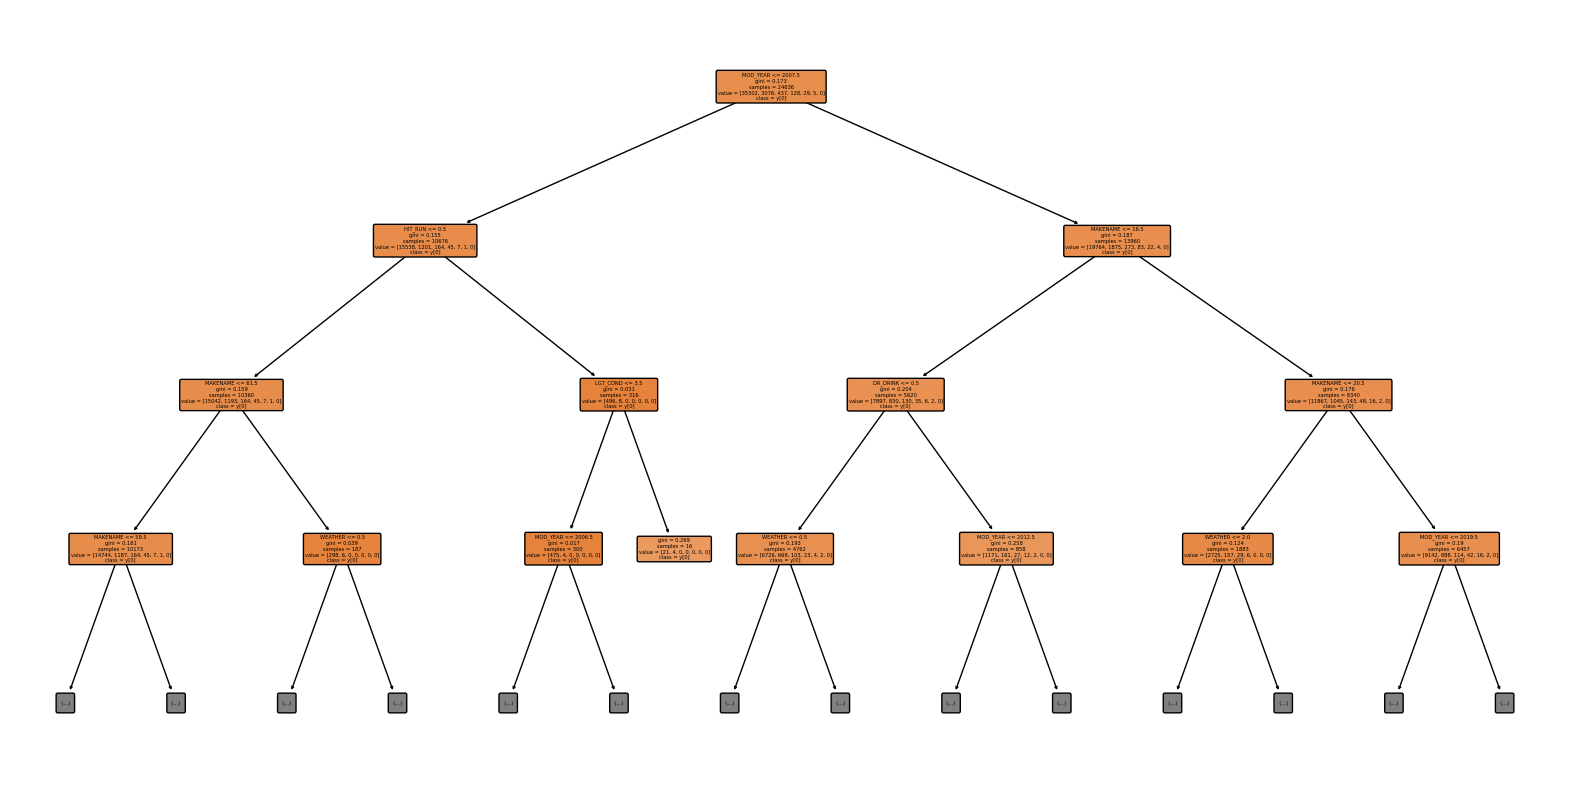

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'tuned_rf' is your trained Random Forest model
# Extract one tree from the Random Forest
chosen_tree = tuned_rf.estimators_[0]

# Set the figure size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(chosen_tree, 
          feature_names=features.columns, 
          class_names=True, 
          filled=True, 
          rounded=True,
          max_depth = 3)

plt.show()
